In [14]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP


In [15]:
# The dataset is already preprocessed...
dataset = pickle.load(open("../datasets/part3_dataset.data", "rb"))


In [16]:
def visualize_pca(dataset: np.ndarray, title: str) -> None:
    pca = PCA(2)
    pca.fit(dataset)
    transformed_data = pca.transform(dataset)
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
    plt.title(title)
    plt.show()

def visualize_tsne(dataset: np.ndarray, title: str, n_components=2, perplexity=30) -> None:
    tsne = TSNE(n_components=n_components, perplexity=perplexity)
    transformed_data = tsne.fit_transform(dataset)
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
    plt.title(title)
    plt.show()

def visualize_umap(dataset: np.ndarray, title: str, n_components=2, min_dist=0.018, n_neighbours=2, metric='cosine') -> None:
    umap = UMAP(n_components=n_components, min_dist=min_dist, n_neighbors=n_neighbours, metric=metric)
    transformed_data = umap.fit_transform(dataset)
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
    plt.title(title)
    plt.show()

visualizing UMAP...


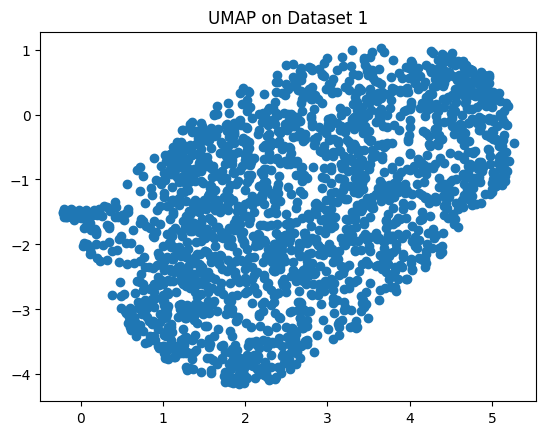

In [20]:

print("visualizing UMAP...")
visualize_umap(dataset, "UMAP on Dataset 1", n_neighbours=100, min_dist=0.01)